# Part I - (Dataset Exploration Title)
## by (your name here)

## Introduction
> Introduce the dataset

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df=pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [4]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
df.shape

(183412, 16)

In [6]:
#There are uneeded columns for analysis. Keep the ones we want for our exploration.
columns=['duration_sec','start_time','end_time','start_station_id','start_station_name','end_station_id','end_station_name','bike_id','user_type','member_birth_year','member_gender','bike_share_for_all_trip']
df_bike=df[columns]
df_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes


In [7]:
#Check datatype and missing values.
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 12 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 16.8+ MB


In [8]:
#Check duplicates
df_bike.duplicated().sum()

0

In [9]:
#drop the ones that is null.
df_bike=df_bike[df_bike['start_station_id'].isnull()==False]
df_bike=df_bike[df_bike['start_station_name'].isnull()==False]
df_bike=df_bike[df_bike['end_station_id'].isnull()==False]
df_bike=df_bike[df_bike['end_station_name'].isnull()==False]
df_bike=df_bike[df_bike['member_birth_year'].isnull()==False]
df_bike=df_bike[df_bike['member_gender'].isnull()==False]

In [10]:
#Change the id's into string
df_bike['start_station_id']=df_bike['start_station_id'].astype(str)
df_bike['end_station_id']=df_bike['end_station_id'].astype(str)
df_bike['bike_id']=df_bike['bike_id'].astype(str)

df_bike['user_type'] = df_bike['user_type'].astype('category')
df_bike['member_gender'] = df_bike['member_gender'].astype('category')

df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 12 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null object
start_station_name         174952 non-null object
end_station_id             174952 non-null object
end_station_name           174952 non-null object
bike_id                    174952 non-null object
user_type                  174952 non-null category
member_birth_year          174952 non-null float64
member_gender              174952 non-null category
bike_share_for_all_trip    174952 non-null object
dtypes: category(2), float64(1), int64(1), object(8)
memory usage: 15.0+ MB


In [11]:
#Change start_time and end_time into datetime
df_bike['start_time'] = pd.to_datetime(df_bike['start_time'])
df_bike['end_time'] = pd.to_datetime(df_bike['end_time'])
df_bike['duration_min']=df_bike['duration_sec']/60

In [12]:
#Add columns : "date", "hour of day" , "day of week"
df_bike['start_date'] = df_bike['start_time'].dt.strftime('%Y-%m-%d')
df_bike['start_hourofday'] = df_bike['start_time'].dt.strftime('%H')
df_bike['start_dayofweek'] = df_bike['start_time'].dt.strftime('%A')

In [13]:
#Add  columns: client's "Age"
df_bike['member_age']=2019-df_bike['member_birth_year']
df_bike['member_birth_year']=df_bike['member_birth_year'].astype(int)
df_bike['member_age']=df_bike['member_age'].astype(int)

df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
end_station_id             174952 non-null object
end_station_name           174952 non-null object
bike_id                    174952 non-null object
user_type                  174952 non-null category
member_birth_year          174952 non-null int64
member_gender              174952 non-null category
bike_share_for_all_trip    174952 non-null object
duration_min               174952 non-null float64
start_date                 174952 non-null object
start_hourofday            174952 non-null object
start_dayofweek            174952 non-null object
member_age                 174952 non-null int64
dtypes: category(2), 

### What is the structure of your dataset?

> * Trip Duration: how long the trip took. "duration_sec"
* Start Time and End Time: start/end date and time for the bike rides. "start_time" and "end_time"
* Stations: start/end station's id and name. "start_station_id", "start_station_name", "end_station_id", and "end_station_name"
* Customer Data: customer's gender, birth date, age, user type, and whether they share for all trip. "member_birth_year", "member_gender", "user_type", and "member_age".
* Bike Info: bike's id and whether share for all trip. "bike_id" and "bike_share_for_all_trip
* Date Info: rental date, rental hour of day, rental day of week, and rental month. "start_date", "start_hourofday", and "start_dayofweek".


### What is/are the main feature(s) of interest in your dataset?

> I am interest in exploring trip duration and what days are popular. Also, I am interested what kind of members there are. What gender, age, and user type they are.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The main feature of this datasets are the following.
* start_time: How long they been using(end_time-start_time). We may derive hour of day and day of week.
* member_birth_year(member_age)
* member_gender
* user_type

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


1. See the distribution of hour of day.

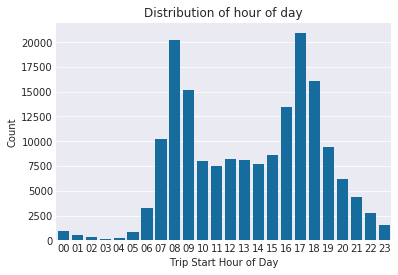

In [14]:
base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')

sb.countplot(data=df_bike, x='start_hourofday', color=base_color);
plt.title("Distribution of hour of day")
plt.xlabel('Trip Start Hour of Day');
plt.ylabel('Count');



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

2. See the distribution of day of week

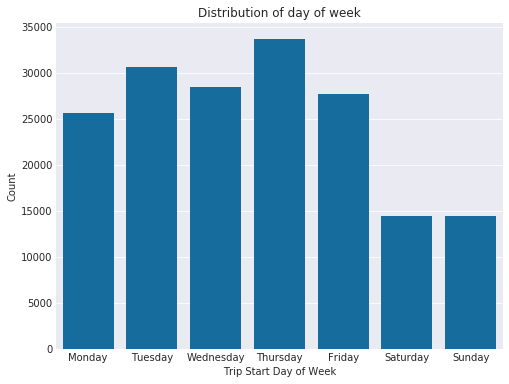

In [15]:
days_ordered=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df_bike['start_dayofweek'] = pd.Categorical(df_bike['start_dayofweek'], categories=days_ordered, ordered=True)

plt.rcParams['figure.figsize'] = 8, 6
sb.countplot(data=df_bike, x='start_dayofweek', color=base_color);
plt.title("Distribution of day of week")
plt.xlabel('Trip Start Day of Week');
plt.ylabel('Count');

3. See the distribution of user type

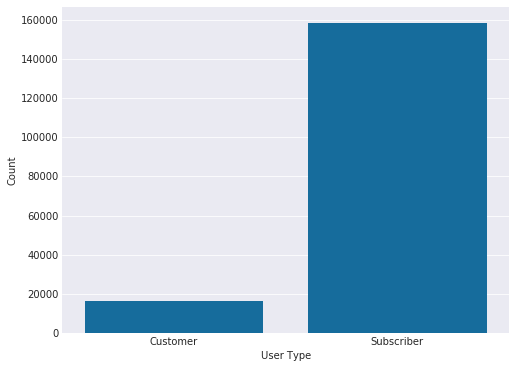

In [16]:
sb.countplot(data=df_bike, x='user_type', color=base_color);
plt.xlabel('User Type');
plt.ylabel('Count');

4. See the distribution of gender

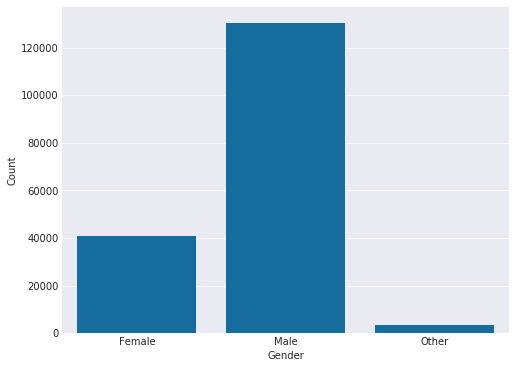

In [17]:
sb.countplot(data=df_bike, x='member_gender', color=base_color);
plt.xlabel('Gender');
plt.ylabel('Count');

5. See the distribution of whether they share the bike for all trip

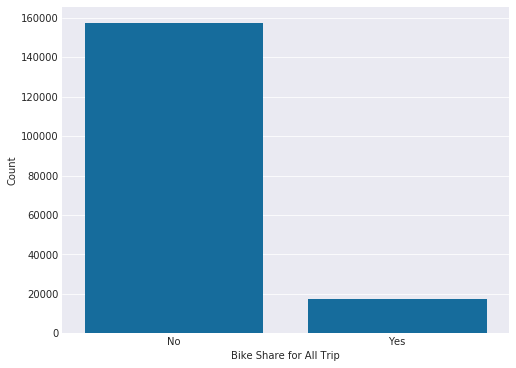

In [18]:
sb.countplot(data=df_bike, x='bike_share_for_all_trip', color=base_color);
plt.xlabel('Bike Share for All Trip');
plt.ylabel('Count');

6. See the distribution of member's age

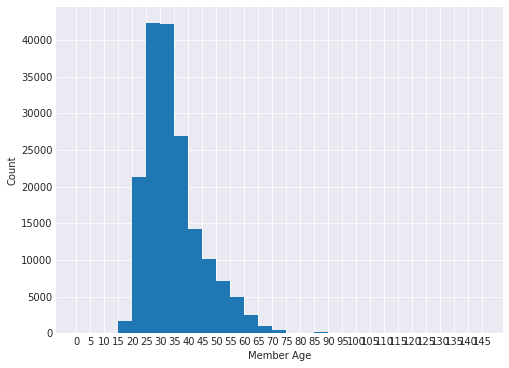

In [19]:
bins = np.arange(0, df_bike['member_age'].max()+5, 5)
plt.hist(data=df_bike, x='member_age', bins=bins);
plt.xticks(bins, bins);
plt.xlabel('Member Age');
plt.ylabel('Count');

Most riders are male who are 25 to 40 years old.By looking at the peak time it was 7am to 9am and 4pm to 6pm. This shows that most riders go during rush hours.Weekdays have more riders than weekends. 

7. See the distribution of duration minute

In [20]:
df_bike['duration_min'].describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

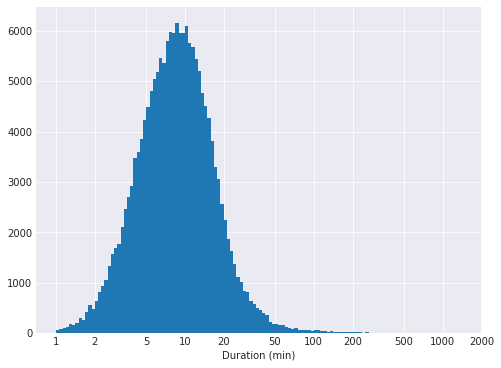

In [21]:
binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df_bike['duration_min'].max())+binsize, binsize)

plt.hist(data = df_bike, x = 'duration_min', bins = bins);
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000], [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]);
plt.xlabel('Duration (min)');

In [29]:
#Remove outliers. Keep duration_min<100
df_bike=df_bike[df_bike['duration_min']<100]
df_bike['duration_min']=df_bike['duration_min'].astype(float)
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174249 entries, 4 to 183411
Data columns (total 17 columns):
duration_sec               174249 non-null int64
start_time                 174249 non-null datetime64[ns]
end_time                   174249 non-null datetime64[ns]
start_station_id           174249 non-null object
start_station_name         174249 non-null object
end_station_id             174249 non-null object
end_station_name           174249 non-null object
bike_id                    174249 non-null object
user_type                  174249 non-null category
member_birth_year          174249 non-null int64
member_gender              174249 non-null category
bike_share_for_all_trip    174249 non-null object
duration_min               174249 non-null float64
start_date                 174249 non-null object
start_hourofday            174249 non-null object
start_dayofweek            174249 non-null category
member_age                 174249 non-null int64
dtypes: category(3)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The peak of people riding bikes is round 7-9am and 16-18pm.
There were more trips on weekdays(Mon-Fri) compared to weekends.

> By looking at the member's information, there were more male riders than female.
Most members were subscribers compared to casual riders. 
The majority of the members did not use bike share for all of their trips.
Most rider's age were around 25 to 40 years old.

> Most ride's trip time is quick which they finish around 5 to 20 minutes, though there were some very long outliers like 23.5 hours.

> No transformation was needed because the data is straight forward.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I was little surprise when I found out that the peak time is during morning and evening. I thought it was during noon. Also, there were more weekday riders than weekend was also suprising result. I used xticks() and figsize to adjust the plot. I also used describe() too to see min, max, and mean. This helped me to clean outliers of duration_min which I filtered out the long trip outlier.

In [30]:
#Save csv file
df_bike.to_csv('biketrip_univariate.csv', index=False)

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

8. Compare trip duration minute between customer and subscriber

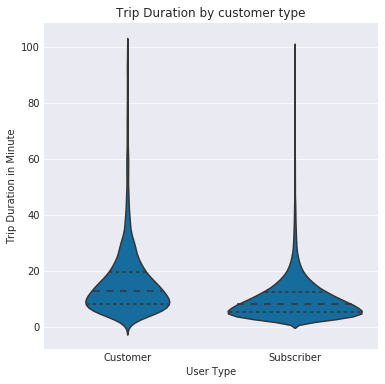

In [31]:
plt.figure(figsize=[6, 6]);

sb.violinplot(data=df_bike, x='user_type', y='duration_min', color=base_color, inner='quartile');
plt.title('Trip Duration by customer type')
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');

The trip duration distribution is much narrower for subscribers compared to customer, subscribers are shorter than customer. This indicates that subscribers have a more specific purpose or usage of riding the bikes compared to customer. 

9. Compare the trip duration minutes between male and female

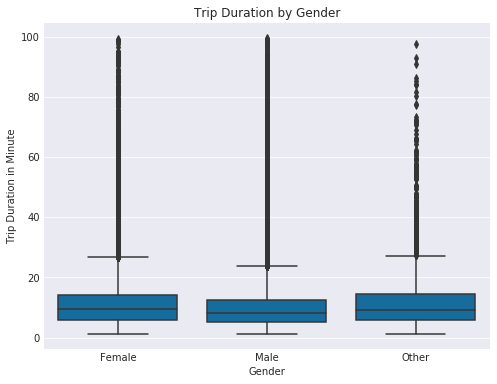

In [32]:
sb.boxplot(data=df_bike, x='member_gender', y='duration_min', color=base_color);
plt.title('Trip Duration by Gender')
plt.xlabel('Gender');
plt.ylabel('Trip Duration in Minute');

There no significant difference but male riders are slightly shorter than female.

10. Average trip duration by week

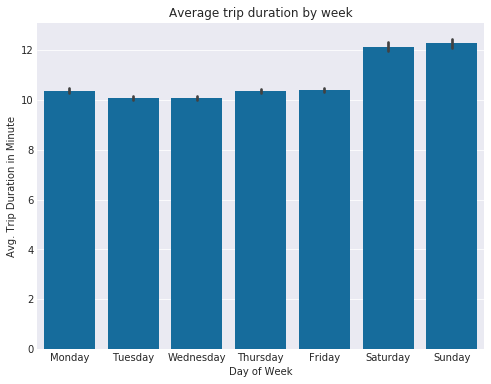

In [33]:
sb.barplot(data=df_bike, x='start_dayofweek', y='duration_min', color=base_color);
plt.title('Average trip duration by week')
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

The riding trips are much shorter on Monday through Friday compared to weekends. This shows that riders who commute for work are more efficient and stable on their usage time. 

11. Member age by week

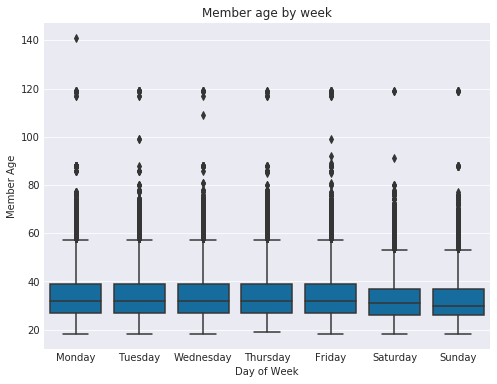

In [34]:
sb.boxplot(data=df_bike, x='start_dayofweek', y='member_age', color=base_color);
plt.title('Member age by week')
plt.xlabel('Day of Week');
plt.ylabel('Member Age');

Weekday riders are slightly older than weekend riders. This shows that commuters who use for work are older than who use for luxury/trip.

12. Member age by user type

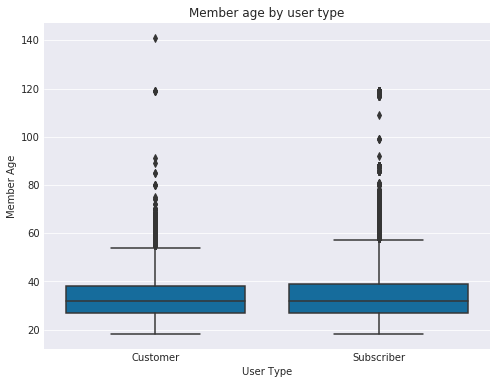

In [35]:
sb.boxplot(data=df_bike, x='user_type', y='member_age', color=base_color);
plt.title('Member age by user type')
plt.xlabel('User Type');
plt.ylabel('Member Age');

This plot shows that subscribers who ride most often weekday are slightly older than customers.

13. User type by week

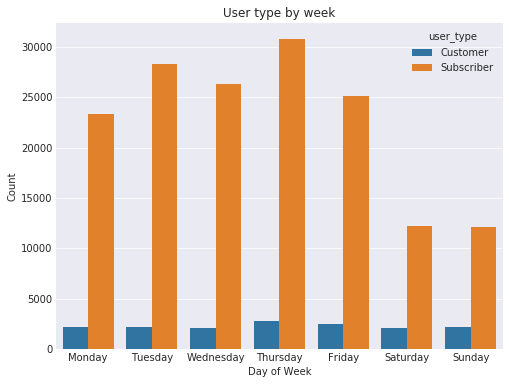

In [36]:
sb.countplot(data=df_bike, x='start_dayofweek', hue='user_type');
plt.title('User type by week')
plt.xlabel('Day of Week');
plt.ylabel('Count');

Overall, there are much more subscribers than customers. The drop of subscriber riders on weekends shows that they primarily ride bikes for work commute during weekdays. However, customer usage don't have a significant peaks or drop. This shows that customer usage purposes are leisure or touring.

14. Daily usage by user type

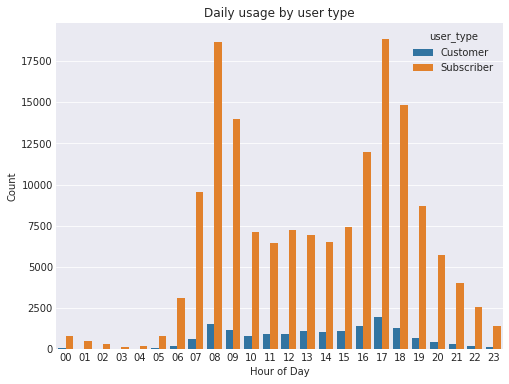

In [37]:
sb.countplot(data=df_bike, x='start_hourofday', hue='user_type');
plt.title('Daily usage by user type')
plt.xlabel('Hour of Day');
plt.ylabel('Count');

Every hour, there are more subscribers than customers. Customers daily usage hours range from 8am to 6pm. They don't have a siginificant peak but they have a small peak at 8am and 5pm. On the other hand, Subscribers have more significant peaks than customers. They have two peaks which are 7-9am and 4-7pm. The rush hour customers are mainly subscribers. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There are lot more subscribers than customers. By looking at subscribers habits, they usually use during weekdays and rush hours which indicates that they use it for commuting to work. On the other hand, customers don't have a siginificant trend compare to subscribers. There were no significant peaks or drop in the plot, they use weekdays and weekends, no trend in daily usage hours. Also, we look at their age which we foudn out that subscribers are slightly older than customers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I found that subscribers are slightly older than customers was interesting because subscribers take much shorter time. Even they are slightly older, they can commute quicker than younger customers.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

15. See the hourly usage by week divided by user type

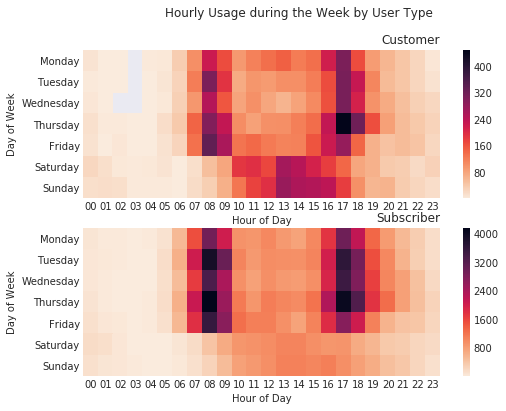

In [38]:
plt.suptitle('Hourly Usage during the Week by User Type')

plt.subplot(2, 1, 1)
customers = df_bike.query('user_type == "Customer"')
ccounts = customers.groupby(['start_dayofweek', 'start_hourofday']).size()
ccounts = ccounts.reset_index(name='count')
ccounts = ccounts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sb.heatmap(ccounts, cmap='rocket_r');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

plt.subplot(2, 1, 2)
subscribers = df_bike.query('user_type == "Subscriber"')
scounts = subscribers.groupby(['start_dayofweek', 'start_hourofday']).size()
scounts = scounts.reset_index(name='count')
scounts = scounts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sb.heatmap(scounts, cmap='rocket_r');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

16. See gender difference of hourly usage

Text(0.5,1,'Gender Usage during the Day')

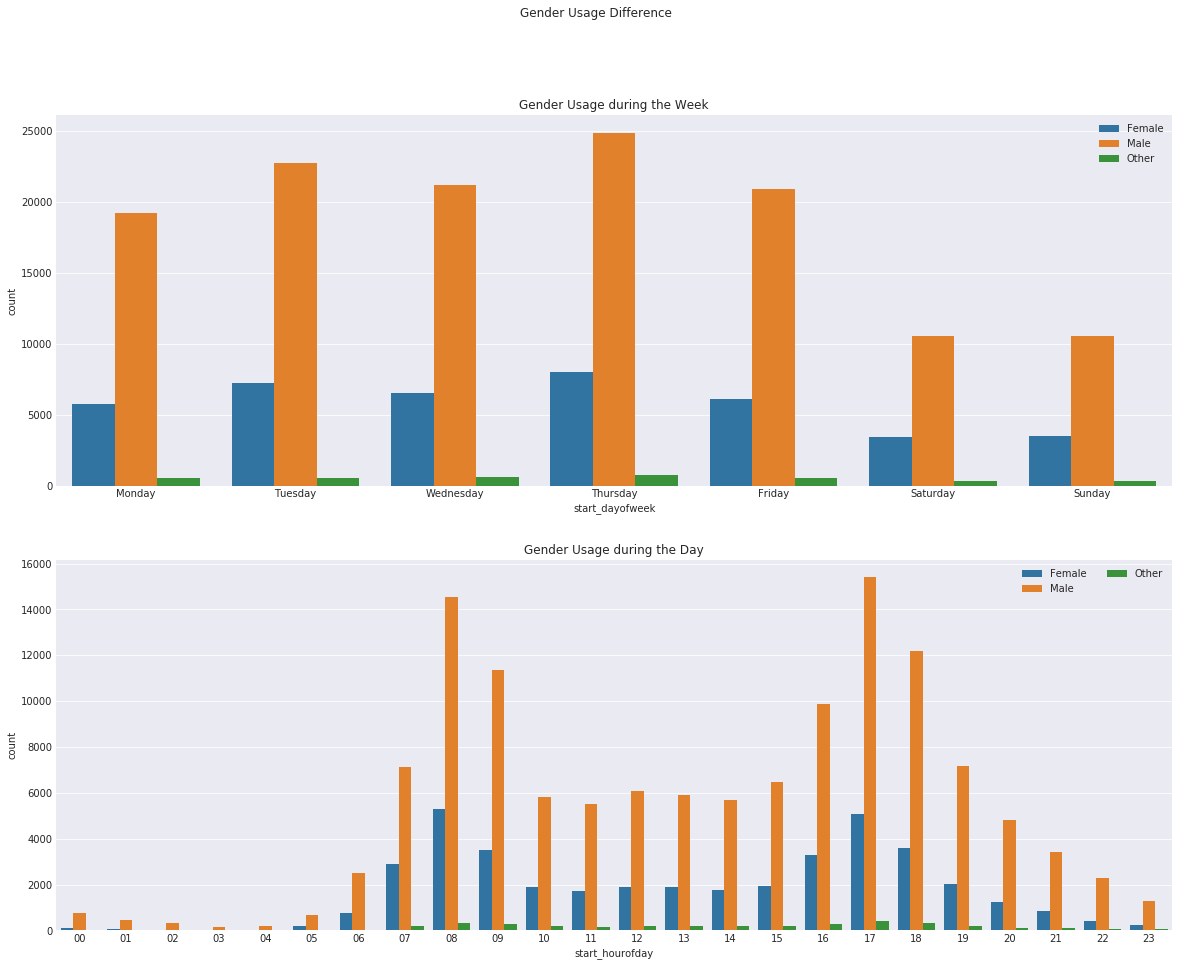

In [39]:
plt.figure(figsize = [20, 15]);
plt.suptitle('Gender Usage Difference')

plt.subplot(2,1,1);
sb.countplot(data = df_bike, x = 'start_dayofweek', hue = 'member_gender');
plt.legend(ncol = 1)
plt.title("Gender Usage during the Week")

plt.subplot(2, 1, 2);
sb.countplot(data = df_bike, x = 'start_hourofday', hue = 'member_gender');
plt.legend(ncol = 2)
plt.title("Gender Usage during the Day")

The heatmaps shows that there is difference in usage number between the two type of riders. Subscriber riders heavily use on weekdays whereas customer riders use on weekends, especailly during afternoon.
Both type of riders are concentrated around 7-9am and 4-6pm on weekdays. Subscribers uses for their commute to work while customer riders use slightly later around 8-9am and 5-6pm. The time range difference is maybe because traffic or weather purpose. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The multivariate exploration strengthened some of the patterns discovered in the previous bivariate exploration and the univariate exploration. Dividing the subscribers and customer by plotting with the combination with weekdays and hours of day visually helped to see more specifically on their habits. Subscribers use during rush hours on weekday, indicates that their primarily usage is for work commute. On the other hand, customer also uses during weekend and strengthen time range usage, which they have a  more relaxing and flexible than subscribers. Customer are less likly to have patterns on when they use and longer trip than subscribers. This indicates that customers are more likely to use for a fun or trip. 

### Were there any interesting or surprising interactions between features?

> The interactions between weekdays and hour day makes it more clear that what their usage purposes. It was interesting that customer usage is are more balanced than subscribers.

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!



There lot more subscribers than customers. Subscribers often use on weekdays and during rush hours which indicates that they use the bike for commute to work. Customer on the other hand don't have a siginificant difference between weekday and weekend. And also no significant difference on when they use. Thus, this indicates that customer usage purpose are for fun/ trip purposes.
Gender and age is not much significant but we found out that male are more quicker than female. For age too, not much siginificant difference but we found that subscribers are slightly older than customers in average.